# N-arm bandit game with Q learning

Imagine a slot machine with multiple arms. When pulled, every arms gives some amount of reward with Gaussian distributin but expected value of each arms is different. Therefore, aim of the agent is to find the arm with the highest average reward and keep pulling it in order the maximize the reward.

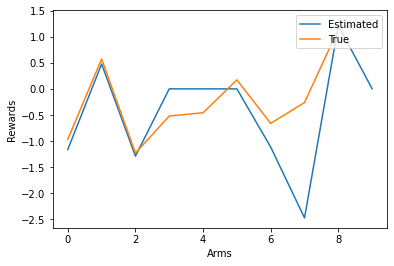

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from random import *

#Which arm
num_arms = 10
num_steps = 100

#Value of epsilon-greedy policy
epsilon = 0.1

# true rewards for each arm
true_rewards = np.random.normal(0, 1, num_arms)

#estimates of rewards for each arm
estimated_rewards = np.zeros(num_arms)

#number of times each arm has been pulled
num_pulls = np.zeros(num_arms)
    
for i in range(num_steps):
        
    if random()< epsilon: #exploration
            
        #choose a random arm for exploration
        arm = np.random.choice(np.arange(num_arms))
            
        # pull that arm and receive reward
        reward = np.random.normal(true_rewards[arm], 1)
            
        # update number of pulls for arm
        num_pulls[arm] += 1
            
    else: #explotation
            
        # choose arm to pull based on current estimates
        arm = np.argmax(estimated_rewards)

        # pull that arm and receive reward
        reward = np.random.normal(true_rewards[arm], 1)

        # update number of pulls for arm
        num_pulls[arm] += 1

    # update estimated reward for arm using sample average
    estimated_rewards[arm] += (reward - estimated_rewards[arm]) / num_pulls[arm]

plt.figure()
plt.plot(estimated_rewards)
plt.plot(true_rewards)
plt.legend(["Estimated","True"], loc = "upper right")
plt.xlabel("Arms")
plt.ylabel("Rewards")
plt.show()